In [214]:
pwd

'/Users/ki/Desktop/capstone_projectData/CorruptVBM_Rejection_Factors/Khamanna'

In [215]:
cd C:\Users\Aidan\Documents\VBM_OPRA_Data\vbm_data

[Errno 2] No such file or directory: 'C:UsersAidanDocumentsVBM_OPRA_Datavbm_data'
/Users/ki/Desktop/capstone_projectData/CorruptVBM_Rejection_Factors/Khamanna


In [216]:
import pandas as pd
pd.set_option("display.max_columns", None) 

In [217]:
raw_df = pd.read_csv('../../vbm12.13.20.csv', low_memory=False)

In [218]:
raw_df

,current_county,current_municipality,current_ward,current_district,ballot_requestType,voter_id,voter_lastName,voter_firstName,voter_middleName,voter_suffix,voter_party,voter_status,ballot_type,ballot_county,ballot_municipality,ballot_ward,ballot_district,ballot_vtr_party,ballot_addr_address1,ballot_addr_address2,ballot_addr_address3,ballot_addr_city,ballot_addr_state,ballot_addr_zipcode,ballot_addr_country,application_receivedDate,application_processedDate,application_status,ballot_mailedDate,ballot_receivedDate,ballot_countedDate,ballot_status,received_type,received_rejReason,voter_resAddr_num,voter_resAddr_street,voter_resAddr_address1,voter_resAddr_address2,voter_resAddr_address3,voter_resAddr_city,voter_resAddr_state,voter_resAddr_zipcode,voter_phone,voter_email,received_bearer
0,Atlantic,Absecon City,01,1.0,Single Election,P2763351335,LINGELBACH,CAROLYN,R,NaN,Unaffiliated,Active,Regular,Atlantic,Absecon City,01,1,Unaffiliated,122 E Faunce Landing Rd,NaN,NaN,Absecon,NJ,08201-1808,NaN,08/14/2020,08/31/2020,Accepted,09/21/2020,10/23/2020,11/20/2020,Accepted,Drop Box,NaN,122,E Faunce Landing Rd,122 E Faunce Landing Rd,NaN,NaN,Absecon,NJ,08201-1808,NaN,NaN,NaN
1,Atlantic,Absecon City,01,1.0,Annual Mail-In Elections,P3919851339,TIMMS,BRIAN,D,NaN,Democratic,Active,Presidential / Removed Resident,Atlantic,Absecon City,01,1,Democratic,506 Lazy Ln,NaN,NaN,Absecon,NJ,08201-1337,US,08/26/2020,08/26/2020,Accepted,09/21/2020,10/21/2020,11/20/2020,Accepted,Drop Box,NaN,506,Lazy Ln,506 Lazy Ln,NaN,NaN,Absecon,NJ,08201-1337,8609447558,BIBLIOMANE74@GMAIL.COM,NaN
2,Atlantic,Absecon City,01,1.0,Single Election,P6095651352,CUSHLANIS,ROBIN,A,NaN,Republican,Active,Regular,Atlantic,Absecon City,01,1,Republican,645 Weilers Ln,NaN,NaN,Absecon,NJ,08201-1326,NaN,08/14/2020,08/31/2020,Accepted,09/21/2020,10/18/2020,11/20/2020,Accepted,Drop Box,NaN,645,Weilers Ln,645 Weilers Ln,NaN,NaN,Absecon,NJ,08201-1326,6093284677,NaN,NaN
3,Atlantic,Absecon City,01,1.0,Single Election,A1425851358,DILLHOFF,KEVIN,T,NaN,Democratic,Active,Regular,Atlantic,Absecon City,01,1,Democratic,635 4th St,NaN,NaN,Absecon,NJ,08201-1304,NaN,08/14/2020,08/31/2020,Accepted,09/21/2020,NaN,11/20/2020,Accepted,Drop Box,NaN,635,4th St,635 4th St,NaN,NaN,Absecon,NJ,08201-1304,NaN,KEVINDILLHOFF@GMAIL.COM,NaN
4,Atlantic,Absecon City,01,1.0,Single Election,A1783751359,JETER,PAUL,D,NaN,Democratic,Active,Regular,Atlantic,Absecon City,01,1,Democratic,511 LAZY LN,NaN,NaN,ABSECON,NJ,08201-1338,US,08/14/2020,08/31/2020,Accepted,09/21/2020,NaN,11/20/2020,Accepted,Drop Box,NaN,511,LAZY LN,511 LAZY LN,NaN,NaN,ABSECON,NJ,08201-1338,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6044852,Warren,White Township,00,6.0,Single Election,L1061243339,COWLEY,JARED,DUANE,Jr.,Democratic,Active,Regular,Warren,White Township,00,6,Democratic,96 BUCKHORN DR,NaN,NaN,WASHINGTON,NJ,07882-3805,US,08/14/2020,10/19/2020,Accepted,10/21/2020,11/03/2020,11/23/2020,Accepted,In Person,NaN,96,BUCKHORN DR,96 BUCKHORN DR,NaN,NaN,WASHINGTON,NJ,07882-3805,NaN,NaN,NaN
6044853,Warren,White Township,00,6.0,Single Election,C2754450078,WELENOFSKY,LISA,JEAN,NaN,Unaffiliated,Active,Regular,Warren,White Township,00,6,Unaffiliated,25 COLBY CT,NaN,NaN,BELVIDERE,NJ,07823-2755,US,08/14/2020,10/19/2020,Accepted,10/21/2020,10/28/2020,11/23/2020,Accepted,Drop Box,NaN,25,COLBY CT,25 COLBY CT,NaN,NaN,BELVIDERE,NJ,07823-2755,NaN,NaN,NaN
6044854,Warren,White Township,00,6.0,Single Election,H4507252594,MCGINLEY,MEGHAN,NaN,NaN,Unaffiliated,Active,Regular,Warren,White Township,00,6,Unaffiliated,23 COLBY CT,NaN,NaN,BELVIDERE,NJ,07823-2755,US,08/14/2020,10/19/2020,Accepted,10/21/2020,10/27/2020,11/23/2020,Accepted,Drop Box,NaN,23,COLBY CT,23 COLBY CT,NaN,NaN,BELVIDERE,NJ,07823-2755,NaN,NaN,NaN
6044855,Warren,White Township,00,6.0,Single Election,N4444001342,CARMEN,KOI,LEA,NaN,Unaffiliated,Active,Regular,Warre

In [219]:
#number of rejected ballots

raw_df['received_rejReason'].count()

50704

In [220]:
#rejected ballots by reason for rejection

raw_df['received_rejReason'].value_counts()

Signature Does Not Match          16824
Certificate Missing               11760
Certificate Not Signed             8880
Other                              7042
Ballot Received After Deadline     2008
Ballot Not Enclosed                1590
Voter Registration ID Missing       953
Bearer Exceeded Limit               910
Incomplete Bearer Portion           403
Moved Out of County                 199
Power of Attorney                    60
Incomplete Assistor Portion          54
Ineligible Voter Status               6
Both Envelopes Unsealed               5
Bearer Book Not Signed In             3
Primary-Voted Both Parties            3
Candidate Provided Assistance         2
One Envelope Unsealed                 2
Name: received_rejReason, dtype: int64

In [221]:
#NA's in Rejection reason should represent accepted ballots AND people who did not vote

raw_df['received_rejReason'].isna().sum()

5994153

In [222]:
print(raw_df['ballot_receivedDate'].unique())

['10/23/2020' '10/21/2020' '10/18/2020' nan '10/28/2020' '10/19/2020'
 '10/22/2020' '10/16/2020' '10/24/2020' '10/29/2020' '10/20/2020'
 '11/03/2020' '10/26/2020' '10/15/2020' '10/17/2020' '10/27/2020'
 '10/30/2020' '11/04/2020' '11/02/2020' '10/25/2020' '10/31/2020'
 '11/01/2020' '11/12/2020' '11/10/2020' '10/05/2020' '11/05/2020'
 '11/06/2020' '10/10/2020' '10/07/2020' '10/09/2020' '10/08/2020'
 '10/06/2020' '10/14/2020' '10/13/2020' '10/12/2020' '10/03/2020'
 '09/29/2020' '10/01/2020' '09/30/2020' '10/04/2020' '10/11/2020'
 '10/02/2020' '11/07/2020' '11/09/2020' '09/22/2020' '11/16/2020'
 '11/14/2020' '11/17/2020' '11/13/2020' '09/09/2020' '09/28/2020'
 '09/02/2020' '11/11/2020' '11/23/2020' '11/20/2020' '09/21/2020'
 '09/24/2020' '09/20/2020' '09/25/2020' '09/05/2020' '08/30/2020'
 '09/14/2020' '09/18/2020' '09/27/2020' '09/04/2020' '09/17/2020'
 '09/23/2020' '09/26/2020' '09/16/2020' '11/08/2020' '09/15/2020'
 '09/12/2020' '09/06/2020' '11/19/2020' '11/18/2020' '12/01/2020'
 '09/1

In [223]:
#Some voters/voter ID's are duplicated in the report:

raw_df['voter_id'].value_counts()

E1576352907    7
N4349817779    6
C3205153239    5
D3143354014    4
O2854653146    4
              ..
F1021552569    1
L2118751241    1
E0660252904    1
P3396351338    1
M4802553852    1
Name: voter_id, Length: 6028484, dtype: int64

In [224]:
#Let's take the most extreme example and see what's going on:

top_dup = raw_df.loc[raw_df['voter_id'] == 'E1576352907']
top_dup

,current_county,current_municipality,current_ward,current_district,ballot_requestType,voter_id,voter_lastName,voter_firstName,voter_middleName,voter_suffix,voter_party,voter_status,ballot_type,ballot_county,ballot_municipality,ballot_ward,ballot_district,ballot_vtr_party,ballot_addr_address1,ballot_addr_address2,ballot_addr_address3,ballot_addr_city,ballot_addr_state,ballot_addr_zipcode,ballot_addr_country,application_receivedDate,application_processedDate,application_status,ballot_mailedDate,ballot_receivedDate,ballot_countedDate,ballot_status,received_type,received_rejReason,voter_resAddr_num,voter_resAddr_street,voter_resAddr_address1,voter_resAddr_address2,voter_resAddr_address3,voter_resAddr_city,voter_resAddr_state,voter_resAddr_zipcode,voter_phone,voter_email,received_bearer
4975832,Passaic,Clifton City,02,8.0,Single Election,E1576352907,BASHJAWISH,FUAD,A,NaN,Republican,Active,Regular,Passaic,Clifton City,02,8,Democratic,117 Mountainside Ter,NaN,NaN,Clifton,NJ,07013-1178,NaN,08/14/2020,08/31/2020,Accepted,NaN,NaN,NaN,NaN,NaN,NaN,117,MOUNTAINSIDE TER,117 MOUNTAINSIDE TER,NaN,NaN,CLIFTON,NJ,07013-1178,9732472453,NaN,NaN
4975833,Passaic,Clifton City,02,8.0,Single Election,E1576352907,BASHJAWISH,FUAD,A,NaN,Republican,Active,Regular,Passaic,Clifton City,02,8,Republican,117 Mountainside Ter,NaN,NaN,Clifton,NJ,07013-1178,NaN,08/14/2020,08/31/2020,Accepted,NaN,NaN,NaN,NaN,NaN,NaN,117,MOUNTAINSIDE TER,117 MOUNTAINSIDE TER,NaN,NaN,CLIFTON,NJ,07013-1178,9732472453,NaN,NaN
4975834,Passaic,Clifton City,02,8.0,Single Election,E1576352907,BASHJAWISH,FUAD,A,NaN,Republican,Active,Regular,Passaic,Clifton City,02,8,Republican,117 Mountainside Ter,NaN,NaN,Clifton,NJ,07013-1178,NaN,08/14/2020,08/31/2020,Accepted,NaN,NaN,NaN,NaN,NaN,NaN,117,MOUNTAINSIDE TER,117 MOUNTAINSIDE TER,NaN,NaN,CLIFTON,NJ,07013-1178,9732472453,NaN,NaN
4975835,Passaic,Clifton City,02,8.0,Single Election,E1576352907,BASHJAWISH,FUAD,A,NaN,Republican,Active,Regular,Passaic,Clifton City,02,8,Republican,117 Mountainside Ter,NaN,NaN,Clifton,NJ,07013-1178,NaN,08/14/2020,08/31/2020,Accepted,NaN,NaN,NaN,NaN,NaN,NaN,117,MOUNTAINSIDE TER,117 MOUNTAINSIDE TER,NaN,NaN,CLIFTON,NJ,07013-1178,9732472453,NaN,NaN
4975836,Passaic,Clifton City,02,8.0,Single Election,E1576352907,BASHJAWISH,FUAD,A,NaN,Republican,Active,Regular,Passaic,Clifton City,02,8,Republican,117 MOUNTAINSIDE TER,NaN,NaN,CLIFTON,NJ,07013-1178,US,08/14/2020,08/31/2020,Accepted,NaN,NaN,NaN,NaN,NaN,NaN,117,MOUNTAINSIDE TER,117 MOUNTAINSIDE TER,NaN,NaN,CLIFTON,NJ,07013-1178,9732472453,NaN,NaN
4975837,Passaic,Clifton City,02,8.0,Single Election,E1576352907,BASHJAWISH,FUAD,A,NaN,Republican,Active,Regular,Passaic,Clifton City,02,8,Republican,117 Mountainside Ter,NaN,NaN,Clifton,NJ,07013-1178,NaN,08/14/2020,08/31/2020,Accepted,NaN,NaN,NaN,NaN,NaN,NaN,117,MOUNTAINSIDE TER,117 MOUNTAINSIDE TER,NaN,NaN,CLIFTON,NJ,07013-1178,9732472453,NaN,NaN
4975838,Passaic,Clifton City,02,8.0,Single Election,E1576352907,BASHJAWISH,FUAD,A,NaN,Republican,Active,Regular,Passaic,Clifton City,02,8,Republican,117 MOUNTAINSIDE TER,NaN,NaN,CLIFTON,NJ,07013-1178,US,08/14/2020,08/31/2020,Accepted,10/06/2020,NaN,NaN,NaN,NaN,NaN,117,MOUNTAINSIDE TER,117 MOUNTAINSIDE TER,NaN,NaN,CLIFTON,NJ,07013-1178,9732472453,NaN,NaN


In [225]:
#It looks like they're identical records, some with lowercase cols and some with uppercase cols

#In this instace, it looks like the last row is the one we want to keep bc it contains the ballot mailed date

In [226]:
#let's see if that holds true for a few more examples

dup_2 = raw_df.loc[raw_df['voter_id'] == 'N4349817779']
dup_2

#Yes, want to keep the last row

,current_county,current_municipality,current_ward,current_district,ballot_requestType,voter_id,voter_lastName,voter_firstName,voter_middleName,voter_suffix,voter_party,voter_status,ballot_type,ballot_county,ballot_municipality,ballot_ward,ballot_district,ballot_vtr_party,ballot_addr_address1,ballot_addr_address2,ballot_addr_address3,ballot_addr_city,ballot_addr_state,ballot_addr_zipcode,ballot_addr_country,application_receivedDate,application_processedDate,application_status,ballot_mailedDate,ballot_receivedDate,ballot_countedDate,ballot_status,received_type,received_rejReason,voter_resAddr_num,voter_resAddr_street,voter_resAddr_address1,voter_resAddr_address2,voter_resAddr_address3,voter_resAddr_city,voter_resAddr_state,voter_resAddr_zipcode,voter_phone,voter_email,received_bearer
5023619,Passaic,Little Falls Township,00,8.0,Single Election,N4349817779,DEFEO,EMMA,L,NaN,Unaffiliated,Active,Regular,Passaic,Little Falls Township,00,8,Unaffiliated,88 BERGEN DR,NaN,NaN,LITTLE FALLS,NJ,07424-1342,US,08/14/2020,08/31/2020,Accepted,NaN,NaN,NaN,NaN,NaN,NaN,88,BERGEN DR,88 BERGEN DR,NaN,NaN,LITTLE FALLS,NJ,07424-1342,NaN,NaN,NaN
5023620,Passaic,Little Falls Township,00,8.0,Single Election,N4349817779,DEFEO,EMMA,L,NaN,Unaffiliated,Active,Regular,Passaic,Little Falls Township,00,8,Republican,88 Bergen Dr,NaN,NaN,Little Falls,NJ,07424-1342,NaN,08/14/2020,08/31/2020,Accepted,NaN,NaN,NaN,NaN,NaN,NaN,88,BERGEN DR,88 BERGEN DR,NaN,NaN,LITTLE FALLS,NJ,07424-1342,NaN,NaN,NaN
5023621,Passaic,Little Falls Township,00,8.0,Single Election,N4349817779,DEFEO,EMMA,L,NaN,Unaffiliated,Active,Regular,Passaic,Little Falls Township,00,8,Republican,88 Bergen Dr,NaN,NaN,Little Falls,NJ,07424-1342,NaN,08/14/2020,08/31/2020,Accepted,NaN,NaN,NaN,NaN,NaN,NaN,88,BERGEN DR,88 BERGEN DR,NaN,NaN,LITTLE FALLS,NJ,07424-1342,NaN,NaN,NaN
5023622,Passaic,Little Falls Township,00,8.0,Single Election,N4349817779,DEFEO,EMMA,L,NaN,Unaffiliated,Active,Regular,Passaic,Little Falls Township,00,8,Unaffiliated,88 BERGEN DR,NaN,NaN,LITTLE FALLS,NJ,07424-1342,US,08/14/2020,08/31/2020,Accepted,NaN,NaN,NaN,NaN,NaN,NaN,88,BERGEN DR,88 BERGEN DR,NaN,NaN,LITTLE FALLS,NJ,07424-1342,NaN,NaN,NaN
5023623,Passaic,Little Falls Township,00,8.0,Single Election,N4349817779,DEFEO,EMMA,L,NaN,Unaffiliated,Active,Regular,Passaic,Little Falls Township,00,8,Republican,88 Bergen Dr,NaN,NaN,Little Falls,NJ,07424-1342,NaN,08/14/2020,08/31/2020,Accepted,NaN,NaN,NaN,NaN,NaN,NaN,88,BERGEN DR,88 BERGEN DR,NaN,NaN,LITTLE FALLS,NJ,07424-1342,NaN,NaN,NaN
5023624,Passaic,Little Falls Township,00,8.0,Single Election,N4349817779,DEFEO,EMMA,L,NaN,Unaffiliated,Active,Regular,Passaic,Little Falls Township,00,8,Unaffiliated,88 BERGEN DR,NaN,NaN,LITTLE FALLS,NJ,07424-1342,US,08/14/2020,08/31/2020,Accepted,10/06/2020,11/02/2020,11/24/2020,Accepted,Drop Box,NaN,88,BERGEN DR,88 BERGEN DR,NaN,NaN,LITTLE FALLS,NJ,07424-1342,NaN,NaN,NaN


In [227]:
dup_3 = raw_df.loc[raw_df['voter_id'] == 'C2833253992']
dup_3

#Same again

#IMPORTANT: the ballot types differ -- top = regular, the rest are "Presidential / Removed Resident"

,current_county,current_municipality,current_ward,current_district,ballot_requestType,voter_id,voter_lastName,voter_firstName,voter_middleName,voter_suffix,voter_party,voter_status,ballot_type,ballot_county,ballot_municipality,ballot_ward,ballot_district,ballot_vtr_party,ballot_addr_address1,ballot_addr_address2,ballot_addr_address3,ballot_addr_city,ballot_addr_state,ballot_addr_zipcode,ballot_addr_country,application_receivedDate,application_processedDate,application_status,ballot_mailedDate,ballot_receivedDate,ballot_countedDate,ballot_status,received_type,received_rejReason,voter_resAddr_num,voter_resAddr_street,voter_resAddr_address1,voter_resAddr_address2,voter_resAddr_address3,voter_resAddr_city,voter_resAddr_state,voter_resAddr_zipcode,voter_phone,voter_email,received_bearer
185265,Bergen,Allendale Borough,00,1.0,Single Election,C2833253992,CALIANESE,JOSEPH,T,NaN,Republican,Active,Regular,Bergen,Allendale Borough,00,1,Republican,68 Canaan Pl,NaN,NaN,Allendale,NJ,07401-1820,NaN,08/14/2020,08/31/2020,Accepted,NaN,NaN,NaN,NaN,NaN,NaN,68,Canaan Pl,68 Canaan Pl,NaN,NaN,Allendale,NJ,07401-1820,NaN,NaN,NaN
185266,Bergen,Allendale Borough,00,1.0,Annual Mail-In Elections,C2833253992,CALIANESE,JOSEPH,T,NaN,Republican,Active,Presidential / Removed Resident,Bergen,Allendale Borough,00,1,Republican,68 CANAAN PL,NaN,NaN,ALLENDALE,NJ,07401-1820,US,09/04/2020,09/04/2020,Accepted,NaN,NaN,NaN,NaN,NaN,NaN,68,Canaan Pl,68 Canaan Pl,NaN,NaN,Allendale,NJ,07401-1820,NaN,NaN,NaN
185267,Bergen,Allendale Borough,00,1.0,Annual Mail-In Elections,C2833253992,CALIANESE,JOSEPH,T,NaN,Republican,Active,Presidential / Removed Resident,Bergen,Allendale Borough,00,1,Republican,68 CANAAN PL,NaN,NaN,ALLENDALE,NJ,07401-1820,US,09/04/2020,09/04/2020,Accepted,NaN,NaN,NaN,NaN,NaN,NaN,68,Canaan Pl,68 Canaan Pl,NaN,NaN,Allendale,NJ,07401-1820,NaN,NaN,NaN
185268,Bergen,Allendale Borough,00,1.0,Annual Mail-In Elections,C2833253992,CALIANESE,JOSEPH,T,NaN,Republican,Active,Presidential / Removed Resident,Bergen,Allendale Borough,00,1,Republican,68 CANAAN PL,NaN,NaN,ALLENDALE,NJ,07401-1820,US,09/04/2020,09/04/2020,Accepted,09/21/2020,10/31/2020,12/02/2020,Accepted,Mail,NaN,68,Canaan Pl,68 Canaan Pl,NaN,NaN,Allendale,NJ,07401-1820,NaN,NaN,NaN


In [228]:
dup_4 = raw_df.loc[raw_df['voter_id'] == 'P3690153923']
dup_4

# Same as above -- last row has dates, but rows have different ballot types AND addresses
# It looks like this one is because they got an overseas ballot

,current_county,current_municipality,current_ward,current_district,ballot_requestType,voter_id,voter_lastName,voter_firstName,voter_middleName,voter_suffix,voter_party,voter_status,ballot_type,ballot_county,ballot_municipality,ballot_ward,ballot_district,ballot_vtr_party,ballot_addr_address1,ballot_addr_address2,ballot_addr_address3,ballot_addr_city,ballot_addr_state,ballot_addr_zipcode,ballot_addr_country,application_receivedDate,application_processedDate,application_status,ballot_mailedDate,ballot_receivedDate,ballot_countedDate,ballot_status,received_type,received_rejReason,voter_resAddr_num,voter_resAddr_street,voter_resAddr_address1,voter_resAddr_address2,voter_resAddr_address3,voter_resAddr_city,voter_resAddr_state,voter_resAddr_zipcode,voter_phone,voter_email,received_bearer
1171072,Camden,Berlin Borough,00,3.0,Single Election,P3690153923,SCOTT,SUSAN,L,NaN,Unaffiliated,Active,Regular,Camden,Berlin Borough,00,3,Unaffiliated,32 Mason Dr,NaN,NaN,Berlin,NJ,08009-7116,NaN,08/14/2020,08/31/2020,Accepted,NaN,NaN,NaN,NaN,NaN,NaN,32,Mason Dr,32 Mason Dr,NaN,NaN,Berlin,NJ,08009-7116,NaN,SUSANLEESCOTTNYC@GMAIL.COM,NaN
1171073,Camden,Berlin Borough,00,3.0,UOCAVA Annual Mail-In Elections,P3690153923,SCOTT,SUSAN,L,NaN,Unaffiliated,Active,Full,Camden,Berlin Borough,00,3,Unaffiliated,HORIZON TOWER - 214 TRAN QUANG KHAI,APT 23.03 TAN DINH,NaN,HO CHI MINH CITY,NaN,70000-7400,VN,09/08/2020,09/08/2020,Accepted,NaN,NaN,NaN,NaN,NaN,NaN,32,Mason Dr,32 Mason Dr,NaN,NaN,Berlin,NJ,08009-7116,NaN,SUSANLEESCOTTNYC@GMAIL.COM,NaN
1171074,Camden,Berlin Borough,00,3.0,Annual Mail-In Elections,P3690153923,SCOTT,SUSAN,L,NaN,Unaffiliated,Active,Presidential / Removed Resident,Camden,Berlin Borough,00,3,Unaffiliated,32 Mason Dr,NaN,NaN,Berlin,NJ,08009-7116,NaN,09/09/2020,09/09/2020,Accepted,NaN,NaN,NaN,NaN,NaN,NaN,32,Mason Dr,32 Mason Dr,NaN,NaN,Berlin,NJ,08009-7116,NaN,SUSANLEESCOTTNYC@GMAIL.COM,NaN
1171075,Camden,Berlin Borough,00,3.0,UOCAVA Annual Mail-In Elections,P3690153923,SCOTT,SUSAN,L,NaN,Unaffiliated,Active,Full,Camden,Berlin Borough,00,3,Unaffiliated,HORIZON TOWER - 214 TRAN QUANG KHAI,APT 23.03 TAN DINH,NaN,HO CHI MINH CITY,NaN,70000-7400,VN,09/19/2020,09/19/2020,Accepted,09/19/2020,11/01/2020,11/19/2020,Accepted,Mail,NaN,32,Mason Dr,32 Mason Dr,NaN,NaN,Berlin,NJ,08009-7116,NaN,SUSANLEESCOTTNYC@GMAIL.COM,NaN


In [229]:
dup_5 = raw_df.loc[raw_df['voter_id'] == 'P3101208027']
dup_5

#Same as before -- some inconsistencies across duplicates but keep the bottom row

,current_county,current_municipality,current_ward,current_district,ballot_requestType,voter_id,voter_lastName,voter_firstName,voter_middleName,voter_suffix,voter_party,voter_status,ballot_type,ballot_county,ballot_municipality,ballot_ward,ballot_district,ballot_vtr_party,ballot_addr_address1,ballot_addr_address2,ballot_addr_address3,ballot_addr_city,ballot_addr_state,ballot_addr_zipcode,ballot_addr_country,application_receivedDate,application_processedDate,application_status,ballot_mailedDate,ballot_receivedDate,ballot_countedDate,ballot_status,received_type,received_rejReason,voter_resAddr_num,voter_resAddr_street,voter_resAddr_address1,voter_resAddr_address2,voter_resAddr_address3,voter_resAddr_city,voter_resAddr_state,voter_resAddr_zipcode,voter_phone,voter_email,received_bearer
4692407,Ocean,Lakehurst Borough,00,1.0,Single Election,P3101208027,NAGLE,SPRING,A,NaN,Republican,Active,Regular,Ocean,Lakehurst Borough,00,1,Republican,121 BROWN AVE,NaN,NaN,LAKEHURST,NJ,08733-3032,US,08/14/2020,08/31/2020,Accepted,NaN,NaN,NaN,NaN,NaN,NaN,121,BROWN AVE,121 BROWN AVE,NaN,NaN,LAKEHURST,NJ,08733-3032,NaN,NaN,NaN
4692408,Ocean,Lakehurst Borough,00,1.0,Annual Mail-In Elections,P3101208027,NAGLE,SPRING,A,NaN,Republican,Active,Presidential / Removed Resident,Ocean,Lakehurst Borough,00,1,Republican,121 BROWN AVE,NaN,NaN,LAKEHURST,NJ,08733-3032,US,09/02/2020,09/02/2020,Accepted,NaN,NaN,NaN,NaN,NaN,NaN,121,BROWN AVE,121 BROWN AVE,NaN,NaN,LAKEHURST,NJ,08733-3032,NaN,NaN,NaN
4692409,Ocean,Lakehurst Borough,00,1.0,Single Election,P3101208027,NAGLE,SPRING,A,NaN,Republican,Active,Regular,Ocean,Lakehurst Borough,00,1,Republican,P.O. BOX 1104,NaN,NaN,BRICK,NJ,08723,US,09/04/2020,09/04/2020,Accepted,NaN,NaN,NaN,NaN,NaN,NaN,121,BROWN AVE,121 BROWN AVE,NaN,NaN,LAKEHURST,NJ,08733-3032,NaN,NaN,NaN
4692410,Ocean,Lakehurst Borough,00,1.0,Annual Mail-In Elections,P3101208027,NAGLE,SPRING,A,NaN,Republican,Active,Presidential / Removed Resident,Ocean,Lakehurst Borough,00,1,Republican,P.O. BOX 1104,NaN,NaN,BRICK,NJ,08723,US,09/11/2020,09/11/2020,Accepted,09/19/2020,10/05/2020,NaN,Received,Mail,NaN,121,BROWN AVE,121 BROWN AVE,NaN,NaN,LAKEHURST,NJ,08733-3032,NaN,NaN,NaN


In [230]:
#testing drop_duplicates to make sure it keps the right row

top_dup_no_dups = top_dup.drop_duplicates(subset=['voter_id'], keep='last')
top_dup_no_dups

,current_county,current_municipality,current_ward,current_district,ballot_requestType,voter_id,voter_lastName,voter_firstName,voter_middleName,voter_suffix,voter_party,voter_status,ballot_type,ballot_county,ballot_municipality,ballot_ward,ballot_district,ballot_vtr_party,ballot_addr_address1,ballot_addr_address2,ballot_addr_address3,ballot_addr_city,ballot_addr_state,ballot_addr_zipcode,ballot_addr_country,application_receivedDate,application_processedDate,application_status,ballot_mailedDate,ballot_receivedDate,ballot_countedDate,ballot_status,received_type,received_rejReason,voter_resAddr_num,voter_resAddr_street,voter_resAddr_address1,voter_resAddr_address2,voter_resAddr_address3,voter_resAddr_city,voter_resAddr_state,voter_resAddr_zipcode,voter_phone,voter_email,received_bearer
4975838,Passaic,Clifton City,02,8.0,Single Election,E1576352907,BASHJAWISH,FUAD,A,NaN,Republican,Active,Regular,Passaic,Clifton City,02,8,Republican,117 MOUNTAINSIDE TER,NaN,NaN,CLIFTON,NJ,07013-1178,US,08/14/2020,08/31/2020,Accepted,10/06/2020,NaN,NaN,NaN,NaN,NaN,117,MOUNTAINSIDE TER,117 MOUNTAINSIDE TER,NaN,NaN,CLIFTON,NJ,07013-1178,9732472453,NaN,NaN


In [231]:
#That worked. Let's apply this to the full dataset now 


df = raw_df.drop_duplicates(subset=['voter_id'], keep='last')

In [232]:
df

,current_county,current_municipality,current_ward,current_district,ballot_requestType,voter_id,voter_lastName,voter_firstName,voter_middleName,voter_suffix,voter_party,voter_status,ballot_type,ballot_county,ballot_municipality,ballot_ward,ballot_district,ballot_vtr_party,ballot_addr_address1,ballot_addr_address2,ballot_addr_address3,ballot_addr_city,ballot_addr_state,ballot_addr_zipcode,ballot_addr_country,application_receivedDate,application_processedDate,application_status,ballot_mailedDate,ballot_receivedDate,ballot_countedDate,ballot_status,received_type,received_rejReason,voter_resAddr_num,voter_resAddr_street,voter_resAddr_address1,voter_resAddr_address2,voter_resAddr_address3,voter_resAddr_city,voter_resAddr_state,voter_resAddr_zipcode,voter_phone,voter_email,received_bearer
0,Atlantic,Absecon City,01,1.0,Single Election,P2763351335,LINGELBACH,CAROLYN,R,NaN,Unaffiliated,Active,Regular,Atlantic,Absecon City,01,1,Unaffiliated,122 E Faunce Landing Rd,NaN,NaN,Absecon,NJ,08201-1808,NaN,08/14/2020,08/31/2020,Accepted,09/21/2020,10/23/2020,11/20/2020,Accepted,Drop Box,NaN,122,E Faunce Landing Rd,122 E Faunce Landing Rd,NaN,NaN,Absecon,NJ,08201-1808,NaN,NaN,NaN
1,Atlantic,Absecon City,01,1.0,Annual Mail-In Elections,P3919851339,TIMMS,BRIAN,D,NaN,Democratic,Active,Presidential / Removed Resident,Atlantic,Absecon City,01,1,Democratic,506 Lazy Ln,NaN,NaN,Absecon,NJ,08201-1337,US,08/26/2020,08/26/2020,Accepted,09/21/2020,10/21/2020,11/20/2020,Accepted,Drop Box,NaN,506,Lazy Ln,506 Lazy Ln,NaN,NaN,Absecon,NJ,08201-1337,8609447558,BIBLIOMANE74@GMAIL.COM,NaN
2,Atlantic,Absecon City,01,1.0,Single Election,P6095651352,CUSHLANIS,ROBIN,A,NaN,Republican,Active,Regular,Atlantic,Absecon City,01,1,Republican,645 Weilers Ln,NaN,NaN,Absecon,NJ,08201-1326,NaN,08/14/2020,08/31/2020,Accepted,09/21/2020,10/18/2020,11/20/2020,Accepted,Drop Box,NaN,645,Weilers Ln,645 Weilers Ln,NaN,NaN,Absecon,NJ,08201-1326,6093284677,NaN,NaN
3,Atlantic,Absecon City,01,1.0,Single Election,A1425851358,DILLHOFF,KEVIN,T,NaN,Democratic,Active,Regular,Atlantic,Absecon City,01,1,Democratic,635 4th St,NaN,NaN,Absecon,NJ,08201-1304,NaN,08/14/2020,08/31/2020,Accepted,09/21/2020,NaN,11/20/2020,Accepted,Drop Box,NaN,635,4th St,635 4th St,NaN,NaN,Absecon,NJ,08201-1304,NaN,KEVINDILLHOFF@GMAIL.COM,NaN
4,Atlantic,Absecon City,01,1.0,Single Election,A1783751359,JETER,PAUL,D,NaN,Democratic,Active,Regular,Atlantic,Absecon City,01,1,Democratic,511 LAZY LN,NaN,NaN,ABSECON,NJ,08201-1338,US,08/14/2020,08/31/2020,Accepted,09/21/2020,NaN,11/20/2020,Accepted,Drop Box,NaN,511,LAZY LN,511 LAZY LN,NaN,NaN,ABSECON,NJ,08201-1338,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6044852,Warren,White Township,00,6.0,Single Election,L1061243339,COWLEY,JARED,DUANE,Jr.,Democratic,Active,Regular,Warren,White Township,00,6,Democratic,96 BUCKHORN DR,NaN,NaN,WASHINGTON,NJ,07882-3805,US,08/14/2020,10/19/2020,Accepted,10/21/2020,11/03/2020,11/23/2020,Accepted,In Person,NaN,96,BUCKHORN DR,96 BUCKHORN DR,NaN,NaN,WASHINGTON,NJ,07882-3805,NaN,NaN,NaN
6044853,Warren,White Township,00,6.0,Single Election,C2754450078,WELENOFSKY,LISA,JEAN,NaN,Unaffiliated,Active,Regular,Warren,White Township,00,6,Unaffiliated,25 COLBY CT,NaN,NaN,BELVIDERE,NJ,07823-2755,US,08/14/2020,10/19/2020,Accepted,10/21/2020,10/28/2020,11/23/2020,Accepted,Drop Box,NaN,25,COLBY CT,25 COLBY CT,NaN,NaN,BELVIDERE,NJ,07823-2755,NaN,NaN,NaN
6044854,Warren,White Township,00,6.0,Single Election,H4507252594,MCGINLEY,MEGHAN,NaN,NaN,Unaffiliated,Active,Regular,Warren,White Township,00,6,Unaffiliated,23 COLBY CT,NaN,NaN,BELVIDERE,NJ,07823-2755,US,08/14/2020,10/19/2020,Accepted,10/21/2020,10/27/2020,11/23/2020,Accepted,Drop Box,NaN,23,COLBY CT,23 COLBY CT,NaN,NaN,BELVIDERE,NJ,07823-2755,NaN,NaN,NaN
6044855,Warren,White Township,00,6.0,Single Election,N4444001342,CARMEN,KOI,LEA,NaN,Unaffiliated,Active,Regular,Warre

In [233]:
#Amount of duplicate records removed:

6047966 - 6032030

15936

In [234]:
# Now let's look at the (hopefully more accurate) numbers we calculated earlier:

df['received_rejReason'].count()

50687

In [235]:
# Number of rejected ballots only changed by ten. 
# This tracks with what we saw above:
#    most duplicate rows appeared not to be associated with a sent/returned ballot

In [236]:
#rejected ballots by reason for rejection

df['received_rejReason'].value_counts()

Signature Does Not Match          16820
Certificate Missing               11760
Certificate Not Signed             8874
Other                              7039
Ballot Received After Deadline     2006
Ballot Not Enclosed                1589
Voter Registration ID Missing       953
Bearer Exceeded Limit               910
Incomplete Bearer Portion           403
Moved Out of County                 198
Power of Attorney                    60
Incomplete Assistor Portion          54
Ineligible Voter Status               6
Both Envelopes Unsealed               5
Bearer Book Not Signed In             3
Primary-Voted Both Parties            3
Candidate Provided Assistance         2
One Envelope Unsealed                 2
Name: received_rejReason, dtype: int64

In [237]:
# NA's in Rejection reason *should* represent accepted ballots AND people who did not vote

df['received_rejReason'].isna().sum()

5977797

In [238]:
df['ballot_status'].value_counts()

Accepted    3982740
Received     335064
Rejected      50532
Name: ballot_status, dtype: int64

In [239]:
# Something isn't right here. Why are we getting more results for *reasons* the ballot was rejected...
# than the number of ballots actually *listed* as rejected??

# Maybe some ballots have two rejection reasons? But if that were the case, shouldn't we still have only wound up
# with of them when we eliminated duplicate rows?

# Maybe some ballots that were initially rejected were later "cured" by the voter...
# and therefore status = accepted, even though rejection reason is still there?
# No way to test this specific hypothesis since there's no direct info on cured ballots in dataset.

# Less specific version: some ballots likely have a rejection reason...
# but are still listed as "received" or even "accepted."

In [240]:
# Let's test out that last idea.

# First, filter the df to only include ballots with a rejection reason.

test_df = df.dropna(subset=['received_rejReason'])
test_df

,current_county,current_municipality,current_ward,current_district,ballot_requestType,voter_id,voter_lastName,voter_firstName,voter_middleName,voter_suffix,voter_party,voter_status,ballot_type,ballot_county,ballot_municipality,ballot_ward,ballot_district,ballot_vtr_party,ballot_addr_address1,ballot_addr_address2,ballot_addr_address3,ballot_addr_city,ballot_addr_state,ballot_addr_zipcode,ballot_addr_country,application_receivedDate,application_processedDate,application_status,ballot_mailedDate,ballot_receivedDate,ballot_countedDate,ballot_status,received_type,received_rejReason,voter_resAddr_num,voter_resAddr_street,voter_resAddr_address1,voter_resAddr_address2,voter_resAddr_address3,voter_resAddr_city,voter_resAddr_state,voter_resAddr_zipcode,voter_phone,voter_email,received_bearer
105,Atlantic,Absecon City,01,1.0,Single Election,D2726451787,FROMM,DIANA,D,NaN,Republican,Active,Regular,Atlantic,Absecon City,01,1,Democratic,533 N Shore Rd,NaN,NaN,Absecon,NJ,08201-1821,NaN,08/14/2020,08/31/2020,Accepted,09/21/2020,NaN,2020-11-19,Rejected,Drop Box,Signature Does Not Match,533,N Shore Rd,533 N Shore Rd,NaN,NaN,Absecon,NJ,08201-1821,NaN,NaN,NaN
345,Atlantic,Absecon City,01,1.0,Single Election,E2481651808,MORGAN,JAMES,A,NaN,Republican,Active,Regular,Atlantic,Absecon City,01,1,Republican,45 Shady Ln,NaN,NaN,Absecon,NJ,08201-1723,NaN,08/14/2020,08/31/2020,Accepted,09/21/2020,11/12/2020,2020-11-12,Rejected,Mail,Ballot Received After Deadline,45,Shady Ln,45 Shady Ln,NaN,NaN,Absecon,NJ,08201-1723,NaN,NaN,NaN
379,Atlantic,Absecon City,01,1.0,Single Election,E3249551811,MAISANO-MAY,JAMIE,L,NaN,Libertarian,Active,Regular,Atlantic,Absecon City,01,1,Libertarian,312 Spruce St,NaN,NaN,Absecon,NJ,08201-1726,NaN,08/14/2020,08/31/2020,Accepted,09/21/2020,11/12/2020,2020-11-12,Rejected,Mail,Ballot Received After Deadline,312,Spruce St,312 Spruce St,NaN,NaN,Absecon,NJ,08201-1726,NaN,NaN,NaN
477,Atlantic,Galloway Township,00,8.0,Single Election,F0365451823,GUENTHER,CHARLES,JOSEPH,Jr.,Unaffiliated,Active,Regular,Atlantic,Absecon City,01,1,Republican,640 Weilers Ln,NaN,NaN,Absecon,NJ,08201-1327,NaN,08/14/2020,08/31/2020,Accepted,09/21/2020,10/27/2020,2020-11-19,Rejected,Drop Box,Signature Does Not Match,718,RAVENWOOD DR,718 RAVENWOOD DR,NaN,NaN,GALLOWAY,NJ,08205-3116,6096468812,NaN,NaN
568,Atlantic,Absecon City,01,1.0,Single Election,B0672452839,MACKENZIE,STEPHEN,E,NaN,Unaffiliated,Active,Regular,Atlantic,Absecon City,01,1,Unaffiliated,243 E Wyoming Ave,NaN,NaN,Absecon,NJ,08201-1709,NaN,08/14/2020,08/31/2020,Accepted,09/21/2020,10/28/2020,2020-11-19,Rejected,Drop Box,Signature Does Not Match,243,E Wyoming Ave,243 E Wyoming Ave,NaN,NaN,Absecon,NJ,08201-1709,6096464232,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6044452,Warren,White Township,00,6.0,Single Election,A6060952460,LUCAS,LEOKADIA,NaN,NaN,Republican,Active,Regular,Warren,White Township,00,6,Republican,86 Summerfield Rd,NaN,NaN,Belvidere,NJ,07823-2713,NaN,08/14/2020,08/31/2020,Accepted,09/28/2020,10/17/2020,2020-11-19,Rejected,In Person,Certificate Not Signed,86,Summerfield Rd,86 Summerfield Rd,NaN,NaN,Belvidere,NJ,07823-2713,NaN,NaN,NaN
6044566,Warren,White Township,00,6.0,Single Election,B1654652468,SHAH,RAJSHREE,S,NaN,Democratic,Active,Regular,Warren,White Township,00,6,Democratic,44 Colby Ct,NaN,NaN,Belvidere,NJ,07823-2756,NaN,08/14/2020,08/31/2020,Accepted,09/28/2020,10/07/2020,2020-11-19,Rejected,Mail,Certificate Missing,44,Colby Ct,44 Colby Ct,NaN,NaN,Belvidere,NJ,07823-2756,NaN,NaN,NaN
6044581,Warren,White Township,00,6.0,Single Election,B1874552469,MARIANI,DAVID,M,NaN,Republican,Active,Regular,Warren,White Township,00,6,Unaffiliated,60 Castners Rd,NaN,NaN,Belvidere,NJ,07823-2802,NaN,08/14/2020,08/31/2020,Accepted,09/28/2020,11/05/2020,2020-11-19,Rejected,Drop Box,Certificate Missing,60,Castners Rd,60 Castners Rd,NaN,NaN,Belvidere,NJ,07823-280

In [241]:
# Next, does status = "accepted"?
# is_accepted is a boolean variable with True or False in it
is_accepted =  test_df['ballot_status']=='Accepted'
print(is_accepted.head())

105    False
345    False
379    False
477    False
568    False
Name: ballot_status, dtype: bool


In [242]:
# now, filter the df to include only ballots with a rejection reason but still listed as accepted

rejected_accepted = test_df[is_accepted]
print(rejected_accepted.shape)

(155, 45)


In [243]:
# looks like there are 153 instances where there's a rejection reason but still accepted
rejected_accepted

,current_county,current_municipality,current_ward,current_district,ballot_requestType,voter_id,voter_lastName,voter_firstName,voter_middleName,voter_suffix,voter_party,voter_status,ballot_type,ballot_county,ballot_municipality,ballot_ward,ballot_district,ballot_vtr_party,ballot_addr_address1,ballot_addr_address2,ballot_addr_address3,ballot_addr_city,ballot_addr_state,ballot_addr_zipcode,ballot_addr_country,application_receivedDate,application_processedDate,application_status,ballot_mailedDate,ballot_receivedDate,ballot_countedDate,ballot_status,received_type,received_rejReason,voter_resAddr_num,voter_resAddr_street,voter_resAddr_address1,voter_resAddr_address2,voter_resAddr_address3,voter_resAddr_city,voter_resAddr_state,voter_resAddr_zipcode,voter_phone,voter_email,received_bearer
1149010,Camden,Audubon Borough,00,3.0,Annual Mail-In Elections,A4936552084,MARTORANO,THERESA,S,NaN,Democratic,Active,Presidential / Removed Resident,Camden,Audubon Borough,00,3,Democratic,540 W MERCHANT ST,NaN,NaN,AUDUBON,NJ,08106-1910,US,12/22/2019,12/22/2019,Accepted,09/29/2020,10/20/2020,11/20/2020,Accepted,Drop Box,Certificate Not Signed,540,W MERCHANT ST,540 W MERCHANT ST,NaN,NaN,AUDUBON,NJ,08106-1910,NaN,NaN,NaN
1157612,Camden,Barrington Borough,00,3.0,Single Election,B6363753982,GABRIEL,LAUREN,A,NaN,Democratic,Active,Regular,Camden,Barrington Borough,00,3,Democratic,18 Page Ave,NaN,NaN,Barrington,NJ,08007-1122,NaN,08/14/2020,08/31/2020,Accepted,09/29/2020,10/15/2020,11/20/2020,Accepted,Mail,Signature Does Not Match,18,Page Ave,18 Page Ave,NaN,NaN,Barrington,NJ,08007-1122,NaN,NaN,NaN
1158316,Camden,Barrington Borough,00,4.0,Single Election,B1113352093,HOWARD,RICHARD,NaN,NaN,Democratic,Active,Regular,Camden,Barrington Borough,00,4,Democratic,4404 Reamer Dr,NaN,NaN,Barrington,NJ,08007-1724,NaN,08/14/2020,08/31/2020,Accepted,09/29/2020,10/14/2020,11/20/2020,Accepted,Mail,Certificate Not Signed,4404,Reamer Dr,4404 Reamer Dr,NaN,NaN,Barrington,NJ,08007-1724,NaN,NaN,NaN
1184123,Camden,Camden City,01,6.0,Single Election,J1612453773,MORALES,CARLOS,J,NaN,Democratic,Active,Regular,Camden,Camden City,01,6,Democratic,1132 W AMERICA RD,NaN,NaN,CAMDEN,NJ,08104-2807,US,08/14/2020,08/31/2020,Accepted,09/28/2020,10/16/2020,11/20/2020,Accepted,Drop Box,Certificate Not Signed,1132,W AMERICA RD,1132 W AMERICA RD,NaN,NaN,CAMDEN,NJ,08104-2807,NaN,NaN,NaN
1235489,Camden,Cherry Hill Township,00,15.0,Single Election,F5090236288,MIZELL,GEORGE,DAVID,NaN,Unaffiliated,Active,Regular,Camden,Cherry Hill Township,00,15,Unaffiliated,1 SILVERTOP LN,NaN,NaN,CHERRY HILL,NJ,08002-1538,US,10/15/2020,10/15/2020,Accepted,10/16/2020,10/21/2020,11/20/2020,Accepted,Drop Box,Signature Does Not Match,1,SILVERTOP LN,1 SILVERTOP LN,NaN,NaN,CHERRY HILL,NJ,08002-1538,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5590310,Sussex,Sparta Township,00,8.0,Single Election,D6205054025,MCNAMARA,GLEN,P,NaN,Unaffiliated,Active,Regular,Sussex,Sparta Township,00,8,Unaffiliated,30 S Shore Trl,NaN,NaN,Sparta,NJ,07871-1611,NaN,08/14/2020,08/31/2020,Accepted,09/15/2020,11/05/2020,11/23/2020,Accepted,Drop Box,Signature Does Not Match,30,S Shore Trl,30 S Shore Trl,NaN,NaN,Sparta,NJ,07871-1611,NaN,NaN,NaN
5670712,Union,Elizabeth City,01,2.0,Single Election,I0711753748,ROJAS,JESUS,A,NaN,Unaffiliated,Active,Regular,Union,Elizabeth City,01,2,Unaffiliated,112 Broadway,NaN,NaN,Elizabeth,NJ,07206-1856,NaN,08/14/2020,08/31/2020,Accepted,09/17/2020,10/29/2020,11/20/2020,Accepted,Bearer,Signature Does Not Match,112,Broadway,112 Broadway,NaN,NaN,Elizabeth,NJ,07206-1856,NaN,NaN,ANDREW ROJAS
5670849,Union,Elizabeth City,01,2.0,Annual Mail-In Elections,A1905253939,ROJAS,JESUS,A,NaN,Unaffiliated,Active,Presidential / Removed Resident,Union,Elizabeth City,01,2,Unaffiliated,112 BROADWAY,NaN,NaN,ELIZABETH,NJ,07206,UNITED STATES,12/22/2019,12/22/2019,Accepted,09/17/2020,10/29/2020,

In [244]:
# My best GUESS is that these are "cured" ballots -- ballots that were initially rejected, but...
# the voter was able to resolve whatever the issue was and get their vote counted

In [245]:
# Now let's check if any ballots have a rejection reason but status = "received" still.

# Does status = "received"?
# is_received is a boolean variable with True or False in it
is_received =  test_df['ballot_status']=='Received'
print(is_received.head())

105    False
345    False
379    False
477    False
568    False
Name: ballot_status, dtype: bool


In [246]:
# now, filter the df to include only ballots with a rejection reason but still listed as received

rejected_received = test_df[is_received]
print(rejected_received.shape)

(0, 45)


In [247]:
# Only two, thankfully.

# So, while this can't be demonstrated in the dataset itself, it seems likely...
# that the cause of the discrepancy is ballots that were initially rejected, then cured later on.

In [248]:
#Let's whittle this down to only the cols we want to keep

small_df = df[['voter_id', 'ballot_county', 'ballot_vtr_party', 'ballot_receivedDate', 'ballot_status', 'received_rejReason']]

In [249]:
small_df

,voter_id,ballot_county,ballot_vtr_party,ballot_receivedDate,ballot_status,received_rejReason
0,P2763351335,Atlantic,Unaffiliated,10/23/2020,Accepted,NaN
1,P3919851339,Atlantic,Democratic,10/21/2020,Accepted,NaN
2,P6095651352,Atlantic,Republican,10/18/2020,Accepted,NaN
3,A1425851358,Atlantic,Democratic,NaN,Accepted,NaN
4,A1783751359,Atlantic,Democratic,NaN,Accepted,NaN
...,...,...,...,...,...,...
6044852,L1061243339,Warren,Democratic,11/03/2020,Accepted,NaN
6044853,C2754450078,Warren,Unaffiliated,10/28/2020,Accepted,NaN
6044854,H4507252594,Warren,Unaffiliated,10/27/2020,Accepted,NaN
6044855,N4444001342,Warren,Unaffiliated,11/04/2020,Accepted,NaN


In [250]:
# Wait -- why do we seem to have some ballots that were accepted but have no received date?

# Lets's filter our df to only rows that have a ballot status, and check how many have no received date.

test_df2 = small_df.dropna(subset=['ballot_status'])
test_df2

,voter_id,ballot_county,ballot_vtr_party,ballot_receivedDate,ballot_status,received_rejReason
0,P2763351335,Atlantic,Unaffiliated,10/23/2020,Accepted,NaN
1,P3919851339,Atlantic,Democratic,10/21/2020,Accepted,NaN
2,P6095651352,Atlantic,Republican,10/18/2020,Accepted,NaN
3,A1425851358,Atlantic,Democratic,NaN,Accepted,NaN
4,A1783751359,Atlantic,Democratic,NaN,Accepted,NaN
...,...,...,...,...,...,...
6044851,B6174726327,Warren,Unaffiliated,11/04/2020,Accepted,NaN
6044852,L1061243339,Warren,Democratic,11/03/2020,Accepted,NaN
6044853,C2754450078,Warren,Unaffiliated,10/28/2020,Accepted,NaN
6044854,H4507252594,Warren,Unaffiliated,10/27/2020,Accepted,NaN


In [251]:
# Now check how many rows have no received date:

test_df2['ballot_receivedDate'].isna().sum()

123446

In [252]:
# that's... a lot.

# Let's do it in the opposite order now. How many have received date but no ballot status?

test_df3 = small_df.dropna(subset=['ballot_receivedDate'])
test_df3

,voter_id,ballot_county,ballot_vtr_party,ballot_receivedDate,ballot_status,received_rejReason
0,P2763351335,Atlantic,Unaffiliated,10/23/2020,Accepted,NaN
1,P3919851339,Atlantic,Democratic,10/21/2020,Accepted,NaN
2,P6095651352,Atlantic,Republican,10/18/2020,Accepted,NaN
5,A4660351369,Atlantic,Unaffiliated,10/21/2020,Accepted,NaN
6,K0876551578,Atlantic,Unaffiliated,10/28/2020,Accepted,NaN
...,...,...,...,...,...,...
6044851,B6174726327,Warren,Unaffiliated,11/04/2020,Accepted,NaN
6044852,L1061243339,Warren,Democratic,11/03/2020,Accepted,NaN
6044853,C2754450078,Warren,Unaffiliated,10/28/2020,Accepted,NaN
6044854,H4507252594,Warren,Unaffiliated,10/27/2020,Accepted,NaN


In [253]:
test_df3['ballot_status'].isna().sum()

1

In [254]:
# that, thankfully, is much much smaller.

# not sure why so many seemingly-returned ballots have no received date...
# but that's beyond the scope of our project right now.

In [255]:
# Let's finally fliter this down to only people who at least attempted to return their ballots.
# It seems like the best assumption we can make to do this is that NA's in ballot status = didn't vote.

In [256]:
clean_VBM = small_df.dropna(subset=['ballot_status'])
clean_VBM

,voter_id,ballot_county,ballot_vtr_party,ballot_receivedDate,ballot_status,received_rejReason
0,P2763351335,Atlantic,Unaffiliated,10/23/2020,Accepted,NaN
1,P3919851339,Atlantic,Democratic,10/21/2020,Accepted,NaN
2,P6095651352,Atlantic,Republican,10/18/2020,Accepted,NaN
3,A1425851358,Atlantic,Democratic,NaN,Accepted,NaN
4,A1783751359,Atlantic,Democratic,NaN,Accepted,NaN
...,...,...,...,...,...,...
6044851,B6174726327,Warren,Unaffiliated,11/04/2020,Accepted,NaN
6044852,L1061243339,Warren,Democratic,11/03/2020,Accepted,NaN
6044853,C2754450078,Warren,Unaffiliated,10/28/2020,Accepted,NaN
6044854,H4507252594,Warren,Unaffiliated,10/27/2020,Accepted,NaN


In [257]:
#... suggesting 4,370,478 people at least tried to vote (regardless of whether ballot was rejected)

In [258]:
# Let's write this to csv

clean_VBM.to_csv('clean_VBM.csv', index=False) 

In [259]:
# Now let's create another dataframe grouped by county

grouped_VBM = clean_VBM.groupby(['ballot_county'])


In [260]:
votes_cast = grouped_VBM.size()
votes_cast

ballot_county
Atlantic      135484
Bergen        476733
Burlington    253339
Camden        246440
Cape May       56565
Cumberland     60047
Essex         307537
Gloucester    170985
Hudson        224243
Hunterdon      84247
Mercer        169955
Middlesex     355993
Monmouth      377148
Morris        293123
Ocean         338676
Passaic       210776
Salem          33022
Somerset      183143
Sussex         87304
Union         243523
Warren         60053
dtype: int64

In [261]:
# note : these numbers do not all match with official turnout results.
#  (example: Warren county)

# Not much that can be done about that at this point until...
#  we hear back from KnowInk about our assumptions while cleaning.

In [262]:
# Let's go ahead and calculate ballot status by county.

In [263]:
number_rejected = grouped_VBM['ballot_status'].apply(lambda x: x.str.contains('Rejected').sum())
number_rejected

ballot_county
Atlantic       910
Bergen        5986
Burlington    1911
Camden         703
Cape May       367
Cumberland     761
Essex         2184
Gloucester     100
Hudson        5605
Hunterdon      618
Mercer        1314
Middlesex     6837
Monmouth      5403
Morris        1122
Ocean         3727
Passaic       1797
Salem          572
Somerset      2369
Sussex         992
Union         6284
Warren         970
Name: ballot_status, dtype: int64

In [264]:
county_df = pd.concat([votes_cast, number_rejected], axis = 'columns', sort=False)

In [265]:
county_df

,0,ballot_status
ballot_county,,
Atlantic,135484,910
Bergen,476733,5986
Burlington,253339,1911
Camden,246440,703
Cape May,56565,367
Cumberland,60047,761
Essex,307537,2184
Gloucester,170985,100
Hudson,224243,5605


In [266]:
county_df.rename(columns={0:'ballots_cast', 'ballot_status':'ballots_rejected'}, inplace=True)

In [267]:
county_df

,ballots_cast,ballots_rejected
ballot_county,,
Atlantic,135484,910
Bergen,476733,5986
Burlington,253339,1911
Camden,246440,703
Cape May,56565,367
Cumberland,60047,761
Essex,307537,2184
Gloucester,170985,100
Hudson,224243,5605


In [268]:
county_df['percent_rejected'] = (county_df['ballots_rejected']/county_df['ballots_cast']) * 100

In [269]:
county_df = county_df.reset_index().sort_values(by='percent_rejected')

In [270]:
#county_df=county_df.drop(county_df.index[14])

In [271]:
#need to check Ocean County, does not make sense they'd have zero rej's

In [272]:
#in the meantime, write to csv

In [273]:
#County Ocean displays "0" results
county_df.loc[county_df['ballot_county']=='Ocean'].index

Int64Index([14], dtype='int64')

In [274]:
#Getting rid of county "Ocean"
#county_df=county_df.drop(county_df.index[0])

In [275]:
#Checking for county Ocean - it's not there
county_df

,ballot_county,ballots_cast,ballots_rejected,percent_rejected
7,Gloucester,170985,100,0.058485
3,Camden,246440,703,0.285262
13,Morris,293123,1122,0.382774
4,Cape May,56565,367,0.648811
0,Atlantic,135484,910,0.671666
6,Essex,307537,2184,0.710158
9,Hunterdon,84247,618,0.733557
2,Burlington,253339,1911,0.754325
10,Mercer,169955,1314,0.773146
15,Passaic,210776,1797,0.852564


In [276]:
county_df.to_csv('county_df.csv', index=False)

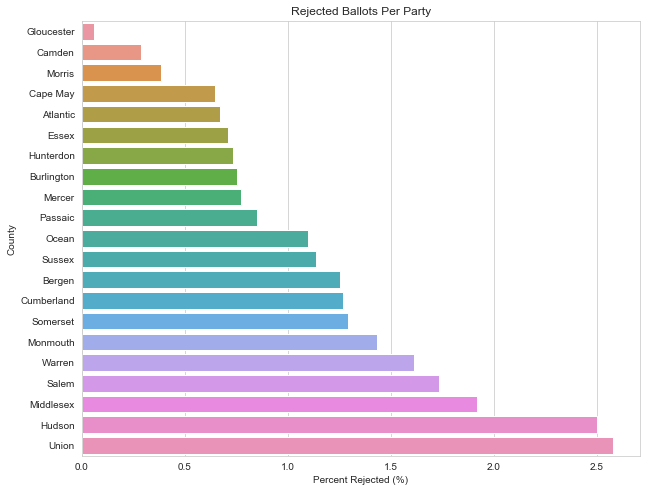

In [277]:
#graphing the rejection rates per Counties
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(y='ballot_county', x='percent_rejected', data=county_df, ax = ax)
plot_var = ax.set(ylabel='County', xlabel='Percent Rejected (%)', title="Rejected Ballots Per Party")

In [519]:
clean_VBM

,voter_id,ballot_county,ballot_vtr_party,ballot_receivedDate,ballot_status,received_rejReason
0,P2763351335,Atlantic,Unaffiliated,10/23/2020,Accepted,NaN
1,P3919851339,Atlantic,Democratic,10/21/2020,Accepted,NaN
2,P6095651352,Atlantic,Republican,10/18/2020,Accepted,NaN
3,A1425851358,Atlantic,Democratic,NaN,Accepted,NaN
4,A1783751359,Atlantic,Democratic,NaN,Accepted,NaN
...,...,...,...,...,...,...
6044851,B6174726327,Warren,Unaffiliated,11/04/2020,Accepted,NaN
6044852,L1061243339,Warren,Democratic,11/03/2020,Accepted,NaN
6044853,C2754450078,Warren,Unaffiliated,10/28/2020,Accepted,NaN
6044854,H4507252594,Warren,Unaffiliated,10/27/2020,Accepted,NaN


In [520]:
#Calculating the number of rejections per party and per county
party_df=pd.DataFrame(clean_VBM.groupby(['ballot_county','ballot_vtr_party','received_rejReason'])\
                      ['voter_id'].size()).reset_index()

party_df.columns = ['ballot_county','ballot_vtr_party','rejReason','rejCount']
party_county=pd.DataFrame(party_df.groupby(['ballot_county','ballot_vtr_party'])['rejCount']\
                           .sum().sort_values(ascending=False)).reset_index()

#Checking for missing values
party_county.isna().sum()

ballot_county       0
ballot_vtr_party    0
rejCount            0
dtype: int64

In [521]:
#Combining the smaller parties under "Other"
Other = ['Conservative Party', 'Green Party','Libertarian','Natural Law Party',\
                                            'Reform Party','Socialist Party',\
                                            'U.S. Constitution Party']
party_county.ballot_vtr_party = party_county.ballot_vtr_party.apply(lambda x: 'Other' if x in Other else x)
party_county=pd.DataFrame(party_county.groupby(['ballot_county','ballot_vtr_party'])['rejCount'].sum().reset_index())

#Pivoting to get the increment count per party - Democratic, Republican, Other, Unaffiliated
party_county=party_county.pivot(index='ballot_county', columns='ballot_vtr_party', values='rejCount').reset_index()

In [522]:
party_county.to_csv('party_county.csv', index=False) 
party_county = pd.read_csv('party_county.csv', low_memory=False)
party_county

,ballot_county,Democratic,Other,Republican,Unaffiliated
0,Atlantic,280.0,32.0,178.0,420.0
1,Bergen,2118.0,111.0,1272.0,2485.0
2,Burlington,673.0,32.0,389.0,817.0
3,Camden,309.0,5.0,81.0,328.0
4,Cape May,59.0,4.0,141.0,164.0
5,Cumberland,241.0,19.0,141.0,361.0
6,Essex,1115.0,23.0,188.0,858.0
7,Gloucester,35.0,NaN,26.0,39.0
8,Hudson,3033.0,142.0,628.0,1802.0
9,Hunterdon,99.0,12.0,232.0,277.0


In [523]:
#Calculating Total Rejections per party and per county

party_ballot=pd.DataFrame(clean_VBM.groupby(['ballot_county','ballot_vtr_party'])\
                      ['voter_id'].size()).reset_index()

party_ballot.columns = ['ballot_county','ballot_vtr_party','totalBallots']
Other = ['Conservative Party', 'Green Party','Libertarian','Natural Law Party',\
                                            'Reform Party','Socialist Party',\
                                            'U.S. Constitution Party']
party_ballot.ballot_vtr_party = party_ballot.ballot_vtr_party.apply(lambda x: 'Other' if x in Other else x)

In [524]:
#Total Ballots received by each party in a given county
party_ballot=pd.DataFrame(party_ballot.groupby(['ballot_county','ballot_vtr_party'])['totalBallots'].sum().reset_index())
party_ballot=party_ballot.pivot(index='ballot_county', columns='ballot_vtr_party', values='totalBallots').reset_index()
party_ballot

ballot_vtr_party,ballot_county,Democratic,Other,Republican,Unaffiliated
0,Atlantic,51716,1364,42689,39715
1,Bergen,195245,3483,112464,165541
2,Burlington,106989,2005,70171,74174
3,Camden,130291,2327,43641,70181
4,Cape May,14880,401,25648,15636
5,Cumberland,23799,800,16540,18908
6,Essex,176164,1860,36458,93055
7,Gloucester,71906,1588,44763,52728
8,Hudson,138818,2480,23369,59576
9,Hunterdon,24073,535,35006,24633


In [525]:
#Modifying the columns names for clarity (adding the word'total' to each column)
party_ballot.to_csv('party_ballot.csv', index=False) 
party_ballot = pd.read_csv('party_ballot.csv', low_memory=False)
party_ballot.columns = ['ballot_county', 'DemTotal','OtherTotal','RepubTotal','UnaffTotal']

In [526]:
#merging two datasets - #of rejections per county and per party merging with Total number of ballots per county and per party
merged_party = pd.merge(party_ballot, party_county, left_on = 'ballot_county', right_on= 'ballot_county', how='outer')

In [527]:
#Merged Dataset
merged_party

,ballot_county,DemTotal,OtherTotal,RepubTotal,UnaffTotal,Democratic,Other,Republican,Unaffiliated
0,Atlantic,51716,1364,42689,39715,280.0,32.0,178.0,420.0
1,Bergen,195245,3483,112464,165541,2118.0,111.0,1272.0,2485.0
2,Burlington,106989,2005,70171,74174,673.0,32.0,389.0,817.0
3,Camden,130291,2327,43641,70181,309.0,5.0,81.0,328.0
4,Cape May,14880,401,25648,15636,59.0,4.0,141.0,164.0
5,Cumberland,23799,800,16540,18908,241.0,19.0,141.0,361.0
6,Essex,176164,1860,36458,93055,1115.0,23.0,188.0,858.0
7,Gloucester,71906,1588,44763,52728,35.0,NaN,26.0,39.0
8,Hudson,138818,2480,23369,59576,3033.0,142.0,628.0,1802.0
9,Hunterdon,24073,535,35006,24633,99.0,12.0,232.0,277.0


In [528]:
#Calculating the percentages
merged_party['Dem_per_totalCountyDem%']=(merged_party['Democratic']/merged_party['DemTotal']*100).round(1)
merged_party['Repub_per_totalCountyRep%']=(merged_party['Republican']/merged_party['RepubTotal']*100).round(1)
merged_party['Other_per_totalCountyOther%']=(merged_party['Other']/merged_party['OtherTotal']*100).round(1)
merged_party['Unaff_per_totalCountyUnaff%']=(merged_party['Unaffiliated']/merged_party['UnaffTotal']*100).round(1)

In [529]:
#Fixing the missing numbers
merged_party=merged_party.fillna(0.0)

In [530]:
#Writing the "party dataset" to csv
merged_party.to_csv('merged_party.csv') 

In [474]:
#Number of rejections per county /  total number of rejections in this party
# party_county['Dem_per_totalDemRej']=(party_county['Democratic']/party_county['Democratic'].sum()*100).round(1)
# party_county['Rep_per_totalRepRej']=(party_county['Republican']/party_county['Republican'].sum()*100).round(1)
# party_county['Other_per_totalOtherRej']=(party_county['Other']/party_county['Other'].sum()*100).round(1)
# party_county['Unaff_per_totalUnaffRej']=(party_county['Unaffiliated']/party_county['Unaffiliated'].sum()*100).round(1)
# party_county

In [475]:
party_df=pd.DataFrame(clean_VBM.groupby(['ballot_vtr_party','received_rejReason'])['voter_id'].size()).reset_index()
party_df.columns = ['ballot_vtr_party','rejReason','rejCount']#.argmax()
party_df.groupby('ballot_vtr_party')['rejCount'].sum().sort_values(ascending=False)


ballot_vtr_party
Unaffiliated               20992
Democratic                 18430
Republican                 10213
U.S. Constitution Party      240
Conservative Party           225
Libertarian                  224
Green Party                  133
Socialist Party              103
Natural Law Party             95
Reform Party                  32
Name: rejCount, dtype: int64

In [283]:
#The ratio of rejections per party
party_df_percent=(((party_df.groupby('ballot_vtr_party')['rejCount'].sum().sort_values(ascending=False)/clean_VBM.ballot_vtr_party\
  .value_counts())*100).round(1)).reset_index()
party_df_percent.columns=['Party','Party_Affiliation%']
party_df_percent

,Party,Party_Affiliation%
0,Conservative Party,2.7
1,Democratic,1.0
2,Green Party,2.3
3,Libertarian,2.1
4,Natural Law Party,3.3
5,Reform Party,3.7
6,Republican,0.9
7,Socialist Party,3.3
8,U.S. Constitution Party,3.2
9,Unaffiliated,1.5


In [284]:
Other = ['Conservative Party', 'Green Party','Libertarian','Natural Law Party',\
                                            'Reform Party','Socialist Party',\
                                            'U.S. Constitution Party']
party_df_percent.Party = party_df_percent.Party.apply(lambda x: 'Other' if x in Other else x)

In [285]:
party_df_percent = party_df_percent.groupby('Party',as_index=False)['Party_Affiliation%'].sum()\
.sort_values(by="Party_Affiliation%",ascending=True)
party_df_percent

,Party,Party_Affiliation%
2,Republican,0.9
0,Democratic,1.0
3,Unaffiliated,1.5
1,Other,20.6


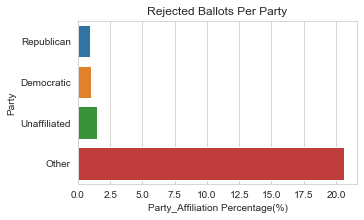

In [286]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(5,3))
sns.barplot(y='Party', x='Party_Affiliation%', data=party_df_percent, ax = ax)
plot_var = ax.set(ylabel='Party', xlabel='Party_Affiliation Percentage(%)', title="Rejected Ballots Per Party")